In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('appl_1980_2014.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [7]:
df.shape

(8465, 7)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

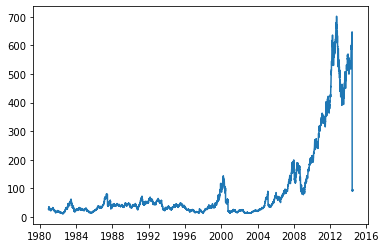

In [10]:
plt.plot(df['Date'], df['Close'])
plt.show()

In [103]:
x = df[['Open','High', 'Low']].values
y = df['Close'].values

In [104]:
n = len(x)
x0 = np.ones(n)

In [105]:
x0

array([1., 1., 1., ..., 1., 1., 1.])

In [106]:
x = np.c_[x0, x]

In [107]:
x

array([[ 1.  , 96.27, 96.8 , 93.92],
       [ 1.  , 94.14, 95.99, 94.1 ],
       [ 1.  , 93.67, 94.1 , 93.2 ],
       ...,
       [ 1.  , 25.37, 25.37, 25.25],
       [ 1.  , 27.38, 27.38, 27.25],
       [ 1.  , 28.75, 28.87, 28.75]])

In [108]:
x.shape

(8465, 4)

In [109]:
x[0]

array([ 1.  , 96.27, 96.8 , 93.92])

In [110]:
x.shape[1]   # For Column

4

In [111]:
x.shape[0]    # For Row

8465

In [112]:
n

8465

In [113]:
for i in range(1,x.shape[1]):
    min_val = min(x[:,i])
    max_val = max(x[:,i])
    for j in range(n):
        numer = x[j][i] - min_val
        denom = max_val - min_val
        x[j][i] = numer / denom

In [114]:
x[0]

array([1.        , 0.12317551, 0.12346711, 0.12042349])

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
mimmax = MinMaxScaler()
scaled_x = mimmax.fit_transform(x)
scaled_y = mimmax.fit_transform(y.reshape(-1,1))

In [117]:
scaled_x[0]

array([0.        , 0.12317551, 0.12346711, 0.12042349])

In [118]:
scaled_y[0]

array([0.1220518])

In [119]:
b = np.zeros(4)

In [131]:
epochs =200
alpha = 0.1

In [132]:
def cost_functions(x,y,b):
    mse = (1/n) * np.sum(((x.dot(b)) - y) ** 2 )   #mse is laso a cost or loss or you can say Error
    return mse

In [133]:
def gradient(x,y,b):
    slope = 0
    inter = 0
    cost_history = []
    for epoch in range(epochs):
        y_pred = x.dot(b)
        loss = y_pred - y
        grad_b = (2/n) * loss.T.dot(x)
        b = b - grad_b * alpha
        err = cost_functions(x,y,b)
        cost_history.append(err)
        print("Epoch : {} Loss : {}".format(epoch,err))
    return b, cost_history


In [134]:
b = np.zeros(4)
new_b , cost = gradient(scaled_x,scaled_y.flatten(),b)

Epoch : 0 Loss : 0.05419966017077635
Epoch : 1 Loss : 0.05048484866618658
Epoch : 2 Loss : 0.04702467939061157
Epoch : 3 Loss : 0.043801697174441344
Epoch : 4 Loss : 0.04079964336188564
Epoch : 5 Loss : 0.03800337379256044
Epoch : 6 Loss : 0.035398782405257595
Epoch : 7 Loss : 0.032972730078509815
Epoch : 8 Loss : 0.03071297834897949
Epoch : 9 Loss : 0.028608127673307695
Epoch : 10 Loss : 0.02664755992197862
Epoch : 11 Loss : 0.024821384815104416
Epoch : 12 Loss : 0.02312039002992002
Epoch : 13 Loss : 0.02153599472830058
Epoch : 14 Loss : 0.020060206269866147
Epoch : 15 Loss : 0.018685579892308707
Epoch : 16 Loss : 0.017405181155544843
Epoch : 17 Loss : 0.016212550960239918
Epoch : 18 Loss : 0.015101672964236095
Epoch : 19 Loss : 0.014066943232513202
Epoch : 20 Loss : 0.013103141967578606
Epoch : 21 Loss : 0.012205407177677222
Epoch : 22 Loss : 0.011369210149988315
Epoch : 23 Loss : 0.010590332605081201
Epoch : 24 Loss : 0.00986484541738317
Epoch : 25 Loss : 0.009189088794312964
Epoch 

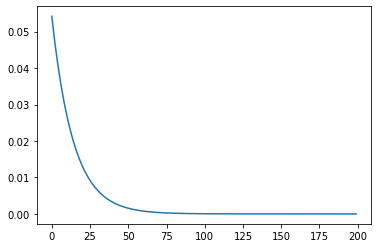

In [135]:
plt.plot(list(range(epochs)),cost)